In [1]:
import numpy as np  #importing numpy
import matplotlib.pyplot as plt
import pandas as pd       #importing pandas 
import seaborn as sns    # importing seaborn lib
import warnings
import requests
warnings.filterwarnings("ignore")
import scipy.stats as stats
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, auc, roc_curve

In [2]:

data = pd.read_csv(r'C:\Users\hp\Desktop\dt\ibm-hr-analytics-employee-attrition-performance\WA_Fn-UseC_-HR-Employee-Attrition.csv')

data1 = pd.read_csv(r'C:\Users\hp\Desktop\dt\ibm-hr-analytics-employee-attrition-performance\WA_Fn-UseC_-HR-Employee-Attrition.csv')


In [3]:
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [4]:
data1

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [7]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [8]:
data.shape

(1470, 35)

In [9]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [10]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [11]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [12]:
data['JobLevel']=data['JobLevel'].astype('object')

In [13]:
data['JobLevel']

0       2
1       2
2       1
3       1
4       1
       ..
1465    2
1466    3
1467    2
1468    2
1469    2
Name: JobLevel, Length: 1470, dtype: object

In [14]:
data['Education'] = data['Education'].replace({ 1 : 'Below College', 2: 'College',3: 'Bachelor',4: 'Master',5 : 'Doctor'})

In [15]:
data['EnvironmentSatisfaction'] = data['EnvironmentSatisfaction'].replace({ 1 : 'Low', 2: 'Medium',3: 'High',4: 'Very High'})

In [16]:
data['JobInvolvement'] = data['JobInvolvement'].replace({ 1 : 'Low', 2: 'Medium',3: 'High',4: 'Very High'})

In [17]:
data['JobSatisfaction'] = data['JobSatisfaction'].replace({ 1 : 'Low', 2: 'Medium',3: 'High',4: 'Very High'})

In [18]:
data['PerformanceRating'] = data['PerformanceRating'].replace({ 1 : 'Low', 2: 'Good',3: 'Excellent',4: 'Outstanding'})

In [19]:
data['WorkLifeBalance'] = data['WorkLifeBalance'].replace({ 1 : 'Bad', 2: 'Good',3: 'Better',4: 'Best'})

In [20]:
data.head(20)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,College,Life Sciences,1,1,...,1,80,0,8,0,Bad,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,Below College,Life Sciences,1,2,...,4,80,1,10,3,Better,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,College,Other,1,4,...,2,80,0,7,3,Better,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,Master,Life Sciences,1,5,...,3,80,0,8,3,Better,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,Below College,Medical,1,7,...,4,80,1,6,3,Better,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,College,Life Sciences,1,8,...,3,80,0,8,2,Good,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,Bachelor,Medical,1,10,...,1,80,3,12,3,Good,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,Below College,Life Sciences,1,11,...,2,80,1,1,2,Better,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,Bachelor,Life Sciences,1,12,...,2,80,0,10,2,Better,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,Bachelor,Medical,1,13,...,2,80,2,17,3,Good,7,7,7,7


In [21]:
data['EnvironmentSatisfaction'] 

0          Medium
1            High
2       Very High
3       Very High
4             Low
          ...    
1465         High
1466    Very High
1467       Medium
1468    Very High
1469       Medium
Name: EnvironmentSatisfaction, Length: 1470, dtype: object

In [22]:
data['EmployeeCount'].value_counts()

1    1470
Name: EmployeeCount, dtype: int64

In [23]:
data['Over18'].value_counts()

Y    1470
Name: Over18, dtype: int64

In [24]:
data['StandardHours'].value_counts()

80    1470
Name: StandardHours, dtype: int64

In [25]:
data =data.drop(['EmployeeCount','Over18','StandardHours'],axis=1)

In [26]:
data.shape

(1470, 32)

In [27]:
data.describe()

,Age,DailyRate,DistanceFromHome,EmployeeNumber,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,1024.865306,65.891156,6502.931293,14313.103401,2.693197,15.209524,2.712245,0.793878,11.279592,2.799320,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,602.024335,20.329428,4707.956783,7117.786044,2.498009,3.659938,1.081209,0.852077,7.780782,1.289271,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,30.000000,1009.000000,2094.000000,0.000000,11.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,491.250000,48.000000,2911.000000,8047.000000,1.000000,12.000000,2.000000,0.000000,6.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,1020.500000,66.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,1.000000,10.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,1555.750000,83.750000,8379.000000,20461.500000,4.000000,18.000000,4.000000,1.000000,15.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,2068.000000,100.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,3.000000,40.000000,6.000000,40.000000,18.000000,15.000000,17.000000


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   object
 7   EducationField            1470 non-null   object
 8   EmployeeNumber            1470 non-null   int64 
 9   EnvironmentSatisfaction   1470 non-null   object
 10  Gender                    1470 non-null   object
 11  HourlyRate                1470 non-null   int64 
 12  JobInvolvement            1470 non-null   object
 13  JobLevel                  1470 non-null   object
 14  JobRole                 

High         453
Very High    446
Medium       287
Low          284
Name: EnvironmentSatisfaction, dtype: int64

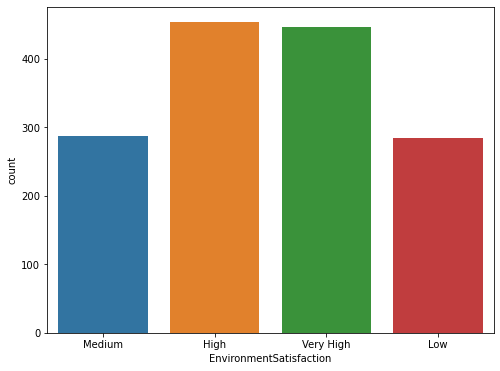

In [29]:
plt.figure(figsize=[8,6])
sns.countplot(x= 'EnvironmentSatisfaction',data=data) 
data['EnvironmentSatisfaction'].value_counts()

* We can see that when decribed the data of EnvironmentSatisfaction  in numerical format the mean and median was 2.72 and 3
  Hence we take 3 value which means 'High'

In [30]:
data['EnvironmentSatisfaction'].isnull().sum()

0

Very High    459
High         442
Low          289
Medium       280
Name: JobSatisfaction, dtype: int64

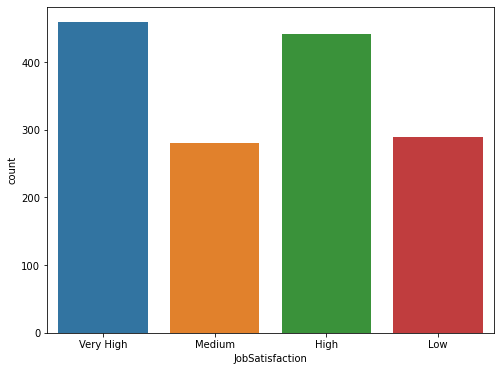

In [31]:
plt.figure(figsize=[8,6])
sns.countplot(x= 'JobSatisfaction',data=data) 
data['JobSatisfaction'].value_counts()

* We can see that when decribed the data of JobSatisfaction in numerical format the mean and median was 2.72 and 3 Hence we take 3 value which means 'High'

Better    893
Good      344
Best      153
Bad        80
Name: WorkLifeBalance, dtype: int64

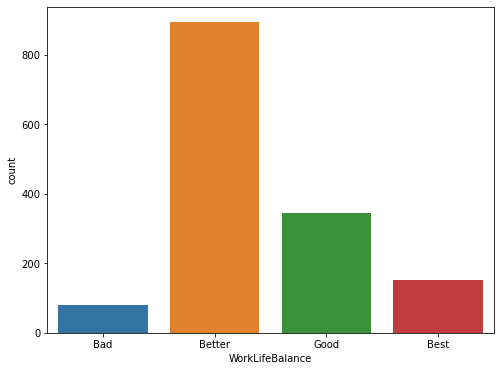

In [32]:
plt.figure(figsize=[8,6])
sns.countplot(x= 'WorkLifeBalance',data=data) 
data['WorkLifeBalance'].value_counts()

* We can see that when decribed the data of JobSatisfaction in numerical format the mean and median was 2.76 and 3 Hence we take 3 value which means 'Better'

1    521
0    197
3    159
2    146
4    139
7     74
6     70
5     63
9     52
8     49
Name: NumCompaniesWorked, dtype: int64

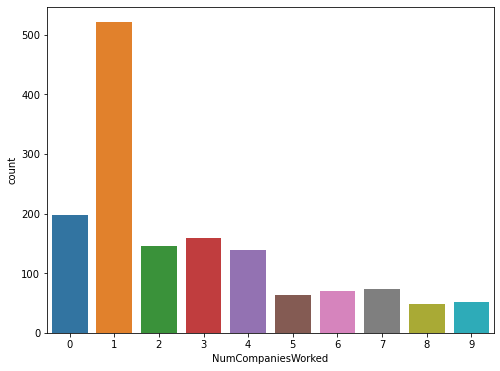

In [33]:
plt.figure(figsize=[8,6])
sns.countplot(x= 'NumCompaniesWorked',data=data) 
data['NumCompaniesWorked'].value_counts()

<AxesSubplot:xlabel='NumCompaniesWorked'>

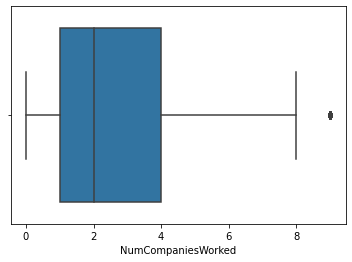

In [34]:
sns.boxplot(x='NumCompaniesWorked',data=data)

* We can see that when decribed the data of NumCompaniesWorked in numerical format the mean and median was 2.69 and 2 Hence we take whole value as 2.

10    202
6     125
8     103
9      96
5      88
7      81
1      81
4      63
12     48
3      42
15     40
16     37
11     36
13     36
21     34
17     33
2      31
14     31
20     30
18     27
19     22
23     22
22     21
24     18
25     14
28     14
26     14
0      11
29     10
31      9
32      9
30      7
33      7
27      7
36      6
34      5
37      4
35      3
40      2
38      1
Name: TotalWorkingYears, dtype: int64

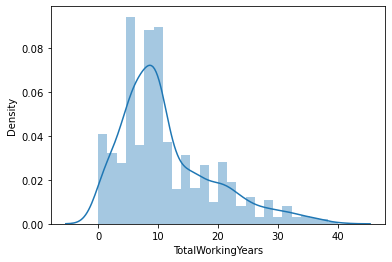

In [35]:
sns.distplot(data.TotalWorkingYears)
data['TotalWorkingYears'].value_counts()

* The graph is right-skewed, as the TotalWorkingYears increases the value decreases

<AxesSubplot:xlabel='TotalWorkingYears'>

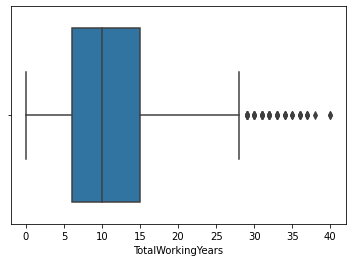

In [36]:
sns.boxplot(x='TotalWorkingYears',data=data)

* We can see that when decribed the data of TotalWorkingYears in numerical format the mean and median was 11.27 and 10 Hence we take whole value as 10 along with that handling the outliers.

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   object
 7   EducationField            1470 non-null   object
 8   EmployeeNumber            1470 non-null   int64 
 9   EnvironmentSatisfaction   1470 non-null   object
 10  Gender                    1470 non-null   object
 11  HourlyRate                1470 non-null   int64 
 12  JobInvolvement            1470 non-null   object
 13  JobLevel                  1470 non-null   object
 14  JobRole                 

Excellent      1244
Outstanding     226
Name: PerformanceRating, dtype: int64

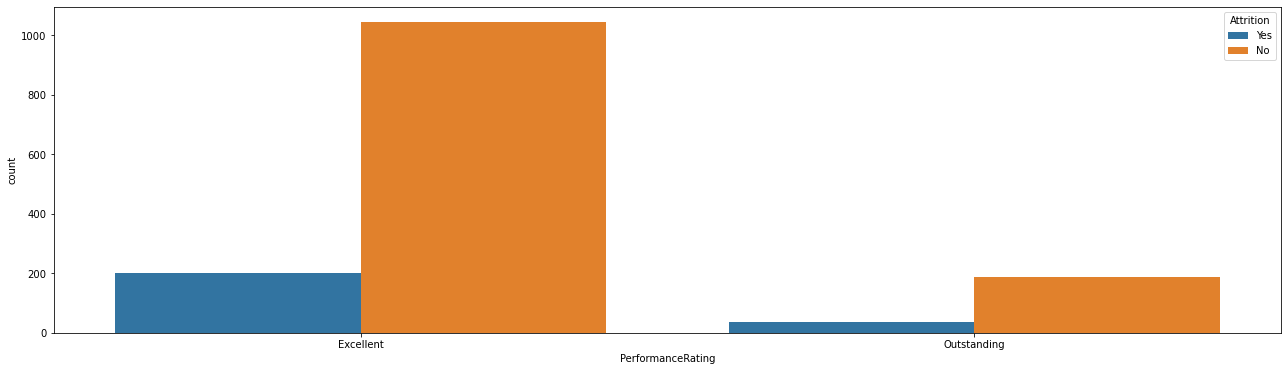

In [38]:
plt.figure(figsize=[22,6])
ax = sns.countplot(x= 'PerformanceRating',hue='Attrition',data=data)

data['PerformanceRating'].value_counts()  

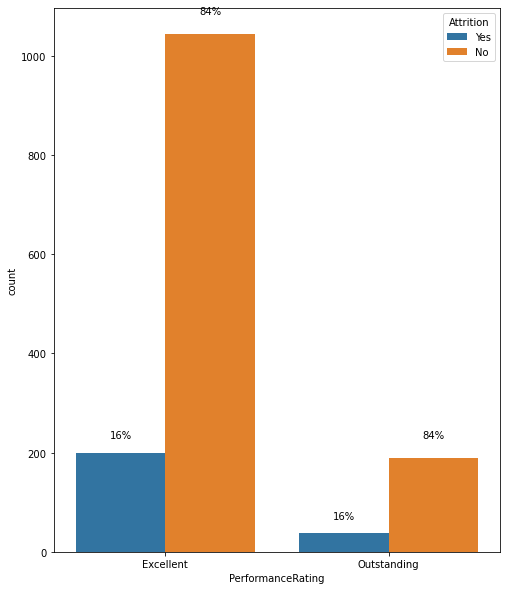

In [39]:
plt.figure(figsize=(8,10))
ax = sns.countplot(x='PerformanceRating', data=data, hue="Attrition")

bars = ax.patches
half = int(len(bars)/2)
left_bars = bars[:half]
right_bars = bars[half:]

for left, right in zip(left_bars, right_bars):
    height_l = left.get_height()
    height_r = right.get_height()
    total = height_l + height_r

    ax.text(left.get_x() + left.get_width()/2., height_l + 30, '{0:.0%}'.format(height_l/total), ha="center")
    ax.text(right.get_x() + right.get_width()/2., height_r + 40, '{0:.0%}'.format(height_r/total), ha="center")

Bachelor         572
Master           398
College          282
Below College    170
Doctor            48
Name: Education, dtype: int64

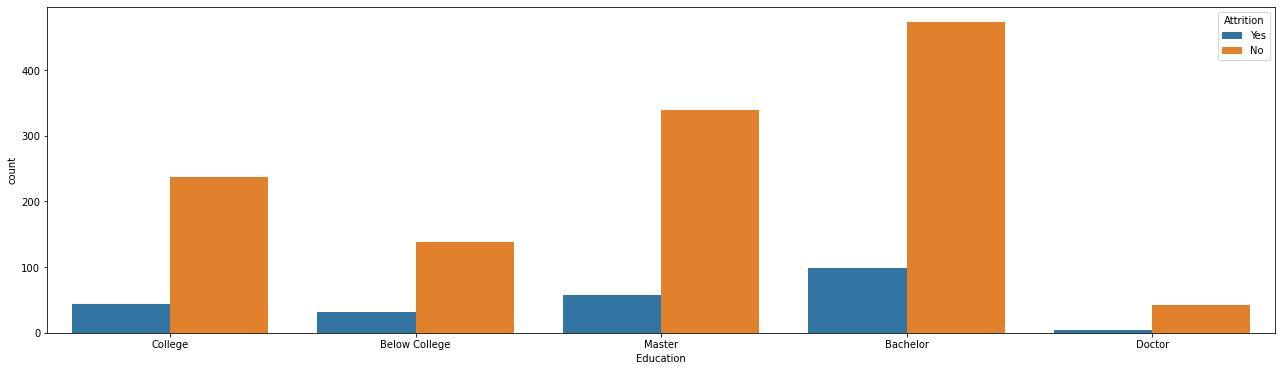

In [40]:
plt.figure(figsize=[22,6])
ax = sns.countplot(x= 'Education',hue='Attrition',data=data)

data['Education'].value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

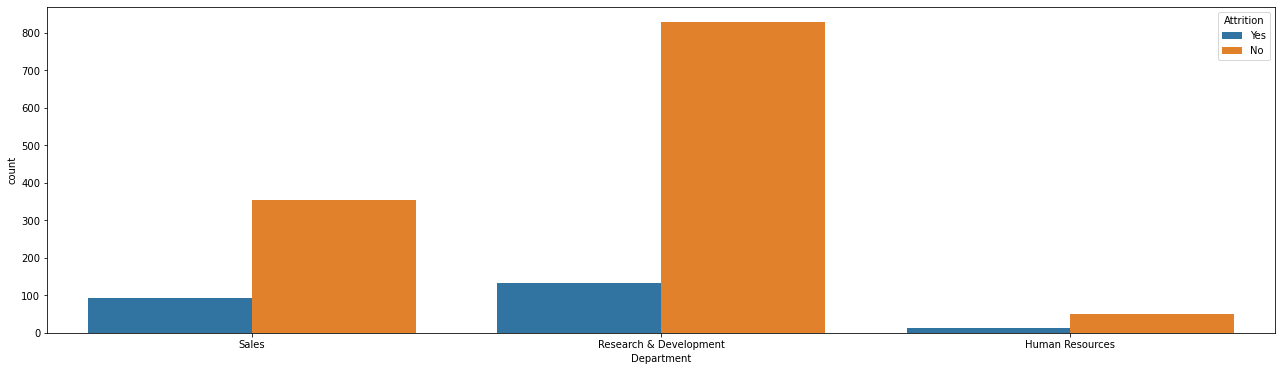

In [41]:
plt.figure(figsize=[22,6])
ax = sns.countplot(x= 'Department',hue='Attrition',data=data)

data['Department'].value_counts()

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

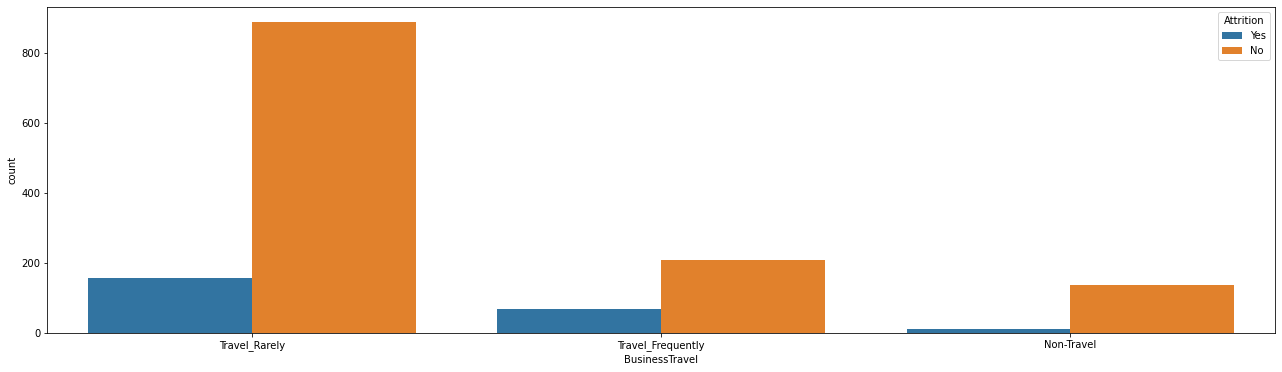

In [42]:
plt.figure(figsize=[22,6])
ax = sns.countplot(x= 'BusinessTravel',hue='Attrition',data=data)

data['BusinessTravel'].value_counts()

Better    893
Good      344
Best      153
Bad        80
Name: WorkLifeBalance, dtype: int64

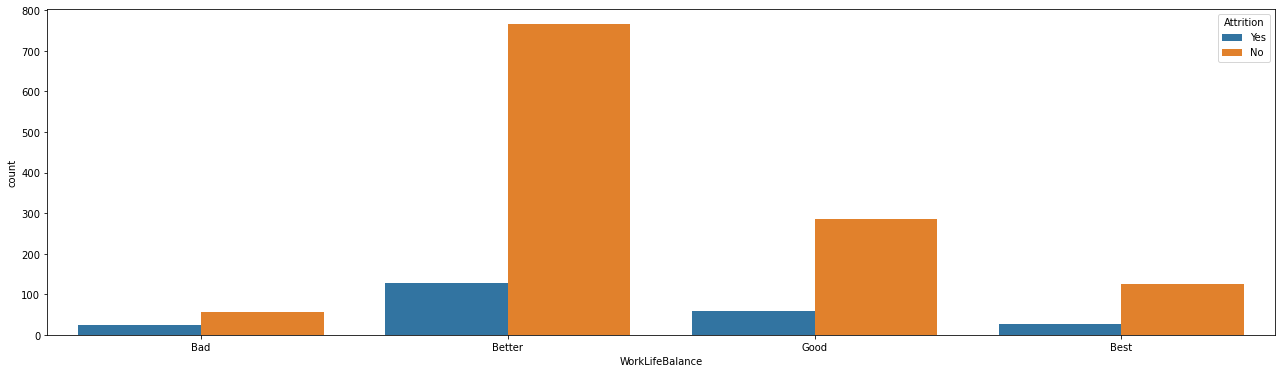

In [43]:
plt.figure(figsize=[22,6])
ax = sns.countplot(x= 'WorkLifeBalance',hue='Attrition',data=data)

data['WorkLifeBalance'].value_counts()

Very High    459
High         442
Low          289
Medium       280
Name: JobSatisfaction, dtype: int64

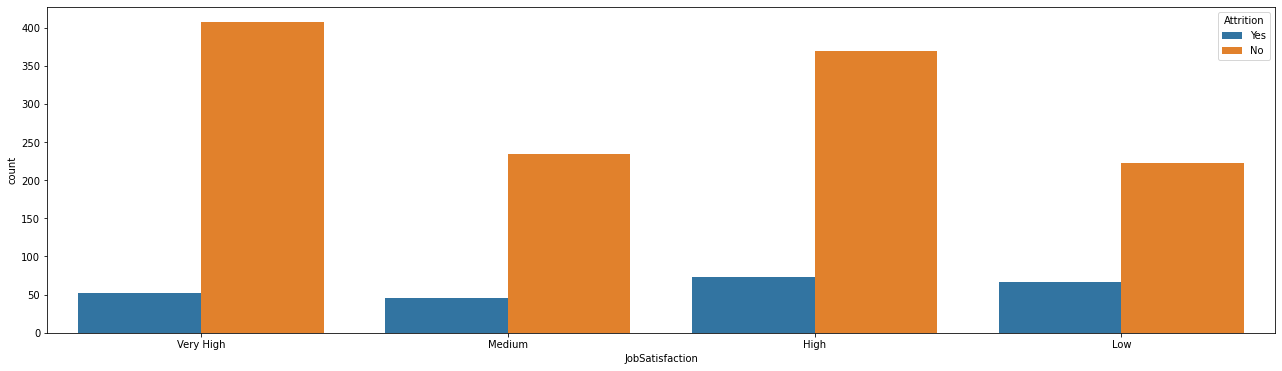

In [44]:
plt.figure(figsize=[22,6])
ax = sns.countplot(x= 'JobSatisfaction',hue='Attrition',data=data)

data['JobSatisfaction'].value_counts()

High         453
Very High    446
Medium       287
Low          284
Name: EnvironmentSatisfaction, dtype: int64

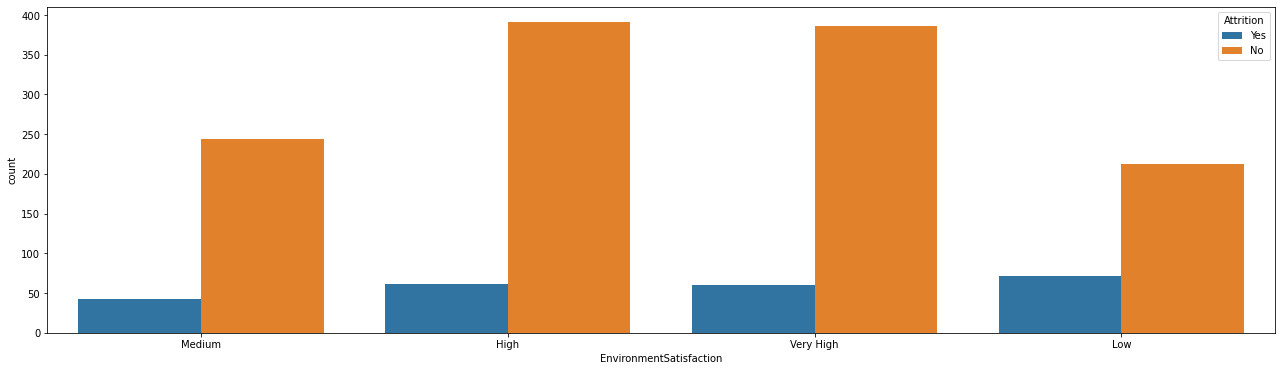

In [45]:
plt.figure(figsize=[22,6])
ax = sns.countplot(x= 'EnvironmentSatisfaction',hue='Attrition',data=data)

data['EnvironmentSatisfaction'].value_counts()

<AxesSubplot:>

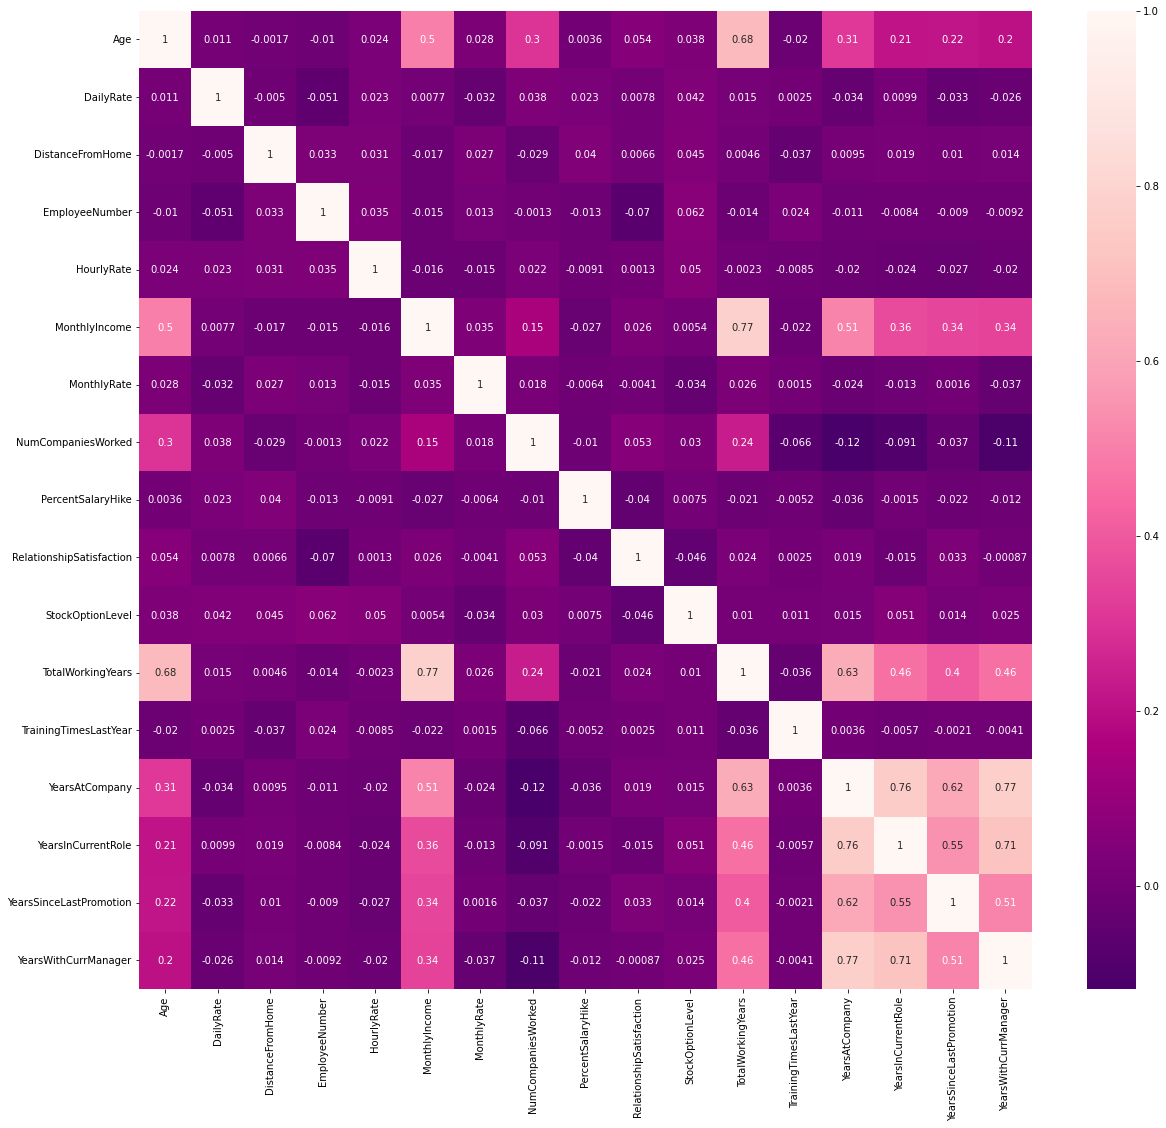

In [46]:
plt.figure(figsize=(20,18))
sns.heatmap(data.corr(),annot = True , cmap='RdPu_r')

In [47]:
data.corr()

,Age,DailyRate,DistanceFromHome,EmployeeNumber,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,-0.010145,0.024287,0.497855,0.028051,0.299635,0.003634,0.053535,0.037510,0.680381,-0.019621,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.050990,0.023381,0.007707,-0.032182,0.038153,0.022704,0.007846,0.042143,0.014515,0.002453,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.032916,0.031131,-0.017014,0.027473,-0.029251,0.040235,0.006557,0.044872,0.004628,-0.036942,0.009508,0.018845,0.010029,0.014406
EmployeeNumber,-0.010145,-0.050990,0.032916,1.000000,0.035179,-0.014829,0.012648,-0.001251,-0.012944,-0.069861,0.062227,-0.014365,0.023603,-0.011240,-0.008416,-0.009019,-0.009197
HourlyRate,0.024287,0.023381,0.031131,0.035179,1.000000,-0.015794,-0.015297,0.022157,-0.009062,0.001330,0.050263,-0.002334,-0.008548,-0.019582,-0.024106,-0.026716,-0.020123
MonthlyIncome,0.497855,0.007707,-0.017014,-0.014829,-0.015794,1.000000,0.034814,0.149515,-0.027269,0.025873,0.005408,0.772893,-0.021736,0.514285,0.363818,0.344978,0.344079
MonthlyRate,0.028051,-0.032182,0.027473,0.012648,-0.015297,0.034814,1.000000,0.017521,-0.006429,-0.004085,-0.034323,0.026442,0.001467,-0.023655,-0.012815,0.001567,-0.036746
NumCompaniesWorked,0.299635,0.038153,-0.029251,-0.001251,0.022157,0.149515,0.017521,1.000000,-0.010238,0.052733,0.030075,0.237639,-0.066054,-0.118421,-0.090754,-0.036814,-0.110319
PercentSalaryHike,0.003634,0.022704,0.040235,-0.012944,-0.009062,-0.027269,-0.006429,-0.010238,1.000000,-0.040490,0.007528,-0.020608,-0.005221,-0.035991,-0.001520,-0.022154,-0.011985
RelationshipSatisfaction,0.053535,0.007846,0.006557,-0.069861,0.001330,0.025873,-0.004085,0.052733,-0.040490,1.000000,-0.045952,0.024054,0.002497,0.019367,-0.015123,0.033493,-0.000867


* MonthlyIncome is highly correlated with TotalWorkingYears

#### Decoding

In [48]:
#data.Attrition=data.Attrition.apply(lambda x : 1 if x=='Yes' else 0)
#data.Gender=data.Gender.apply(lambda x : 1 if x=='Male' else 0)

In [49]:
data.head(30)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,College,Life Sciences,1,Medium,...,Excellent,1,0,8,0,Bad,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,Below College,Life Sciences,2,High,...,Outstanding,4,1,10,3,Better,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,College,Other,4,Very High,...,Excellent,2,0,7,3,Better,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,Master,Life Sciences,5,Very High,...,Excellent,3,0,8,3,Better,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,Below College,Medical,7,Low,...,Excellent,4,1,6,3,Better,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,College,Life Sciences,8,Very High,...,Excellent,3,0,8,2,Good,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,Bachelor,Medical,10,High,...,Outstanding,1,3,12,3,Good,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,Below College,Life Sciences,11,Very High,...,Outstanding,2,1,1,2,Better,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,Bachelor,Life Sciences,12,Very High,...,Outstanding,2,0,10,2,Better,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,Bachelor,Medical,13,High,...,Excellent,2,2,17,3,Good,7,7,7,7


In [50]:
data1.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [51]:
data1['Gender'].replace({'Female': 1, 'Male': 0}, inplace=True)
data1['OverTime'].replace({'Yes': 1, 'No': 0}, inplace=True)


In [52]:
data1['BusinessTravel'].replace({'Travel_Rarely': 1,'Travel_Frequently':2,'Non-Travel':0 }, inplace=True)

In [53]:
data1['Gender']

0       1
1       0
2       0
3       1
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Gender, Length: 1470, dtype: int64

In [54]:
data1['BusinessTravel']

0       1
1       2
2       1
3       2
4       1
       ..
1465    2
1466    1
1467    1
1468    2
1469    1
Name: BusinessTravel, Length: 1470, dtype: int64

In [55]:
data1['Attrition'].replace({'Yes': 1, 'No': 0}, inplace=True)


In [56]:
data1['Attrition']

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

In [57]:
X = data1.drop(['Attrition', 'EducationField','MaritalStatus','EmployeeCount','Over18','StandardHours','JobLevel','Department','JobRole','NumCompaniesWorked','PercentSalaryHike','StockOptionLevel','YearsWithCurrManager'], axis=1).reset_index(drop=True)
Y = data1['Attrition']  

In [58]:
X

,Age,BusinessTravel,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,...,MonthlyRate,OverTime,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion
0,41,1,1102,1,2,1,2,1,94,3,...,19479,1,3,1,8,0,1,6,4,0
1,49,2,279,8,1,2,3,0,61,2,...,24907,0,4,4,10,3,3,10,7,1
2,37,1,1373,2,2,4,4,0,92,2,...,2396,1,3,2,7,3,3,0,0,0
3,33,2,1392,3,4,5,4,1,56,3,...,23159,1,3,3,8,3,3,8,7,3
4,27,1,591,2,1,7,1,0,40,3,...,16632,0,3,4,6,3,3,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,2,884,23,2,2061,3,0,41,4,...,12290,0,3,3,17,3,3,5,2,0
1466,39,1,613,6,1,2062,4,0,42,2,...,21457,0,3,1,9,5,3,7,7,1
1467,27,1,155,4,3,2064,2,0,87,4,...,5174,1,4,2,6,0,3,6,2,0
1468,49,2,1023,2,3,2065,4,0,63,2,...,13243,0,3,4,17,3,2,9,6,0


In [59]:
Y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

#### Splitting the data

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=1)


In [61]:

print(X_train.shape)
print(Y_train.shape)

(1176, 22)
(1176,)


In [62]:
print(X_test.shape)
print(Y_test.shape)

(294, 22)
(294,)


##### Logistic Regression
 ###### Model Training

In [63]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,Y_train)


LogisticRegression()

In [64]:

X_train_prediction = model.predict(X_train)


In [65]:
print(X_train_prediction)
len(X_train_prediction)

[0 0 0 ... 0 0 0]


1176

In [66]:
from sklearn.metrics import accuracy_score
training_data_accuracy1 = accuracy_score(Y_train, X_train_prediction)
print('Accuracy score of training data : ', training_data_accuracy1)


Accuracy score of training data :  0.8520408163265306


In [67]:
X_test_prediction = model.predict(X_test)


In [68]:
print(X_test_prediction)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [69]:
test_data_accuracy1 = accuracy_score(Y_test, X_test_prediction)
print('Accuracy score of testing data : ', test_data_accuracy1)


Accuracy score of testing data :  0.8027210884353742


##### Confusion Matrix


In [70]:
from sklearn.metrics import confusion_matrix
confusion_matrix = pd.DataFrame(confusion_matrix(Y_train, X_train_prediction))
print("Confusion matrix for logistic regression model")
print(confusion_matrix)


Confusion matrix for logistic regression model
     0  1
0  995  2
1  172  7


In [71]:
from sklearn.metrics import confusion_matrix
confusion_matrix1 = pd.DataFrame(confusion_matrix(Y_test, X_test_prediction))

print("Confusion matrix for logistic regression model")
print(confusion_matrix1)

Confusion matrix for logistic regression model
     0  1
0  235  1
1   57  1


#### Decision Tree

In [72]:
from sklearn.tree import DecisionTreeClassifier


In [73]:
model2 = DecisionTreeClassifier()
model2.fit(X_train,Y_train)

DecisionTreeClassifier()

In [74]:

X_train_prediction1 = model2.predict(X_train)


In [75]:
print(X_train_prediction1)
len(X_train_prediction1)

[0 0 1 ... 0 0 0]


1176

In [76]:
from sklearn.metrics import accuracy_score
training_data_accuracy2 = accuracy_score(Y_train, X_train_prediction1)
print('Accuracy score of training data : ', training_data_accuracy2)


Accuracy score of training data :  1.0


In [77]:
X_test_prediction1 = model2.predict(X_test)


In [78]:
print(X_test_prediction1)
len(X_test_prediction1)

[0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 1 1
 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1
 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0]


294

In [79]:
test_data_accuracy2 = accuracy_score(Y_test, X_test_prediction1)
print('Accuracy score of testing data : ', test_data_accuracy2)


Accuracy score of testing data :  0.7687074829931972


In [80]:
from sklearn.metrics import confusion_matrix
confusion_matrix = pd.DataFrame(confusion_matrix(Y_train, X_train_prediction1))
print("Confusion matrix for DecisionTreeClassifier model")
print(confusion_matrix)

Confusion matrix for DecisionTreeClassifier model
     0    1
0  997    0
1    0  179


In [81]:
from sklearn.metrics import confusion_matrix
confusion_matrix = pd.DataFrame(confusion_matrix(Y_test, X_test_prediction1))
print("Confusion matrix for DecisionTreeClassifier model")
print(confusion_matrix)

Confusion matrix for DecisionTreeClassifier model
     0   1
0  206  30
1   38  20


#### RandomForestClassifier

In [82]:
from sklearn.ensemble import RandomForestClassifier
model3 = RandomForestClassifier(n_estimators=100)

In [83]:
model3.fit(X_train,Y_train)

RandomForestClassifier()

In [84]:

X_train_prediction2 = model3.predict(X_train)


In [85]:
print(X_train_prediction2)

[0 0 1 ... 0 0 0]


In [86]:
from sklearn.metrics import accuracy_score
tra_data_accuracy3 = accuracy_score(Y_train, X_train_prediction2)
print('Accuracy score of training data : ', tra_data_accuracy3)


Accuracy score of training data :  1.0


In [87]:
X_test_prediction2 = model3.predict(X_test)


In [88]:
print(X_test_prediction2)

[0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [89]:
test_data_accuracy3 = accuracy_score(Y_test, X_test_prediction2)
print('Accuracy score of testing data : ', test_data_accuracy3)

Accuracy score of testing data :  0.8231292517006803


In [90]:
from sklearn.metrics import confusion_matrix
confusion_matrix = pd.DataFrame(confusion_matrix(Y_train, X_train_prediction2))
print("Confusion matrix for RandomForestClassifier model")
print(confusion_matrix)

Confusion matrix for RandomForestClassifier model
     0    1
0  997    0
1    0  179


In [91]:
from sklearn.metrics import confusion_matrix
confusion_matrix = pd.DataFrame(confusion_matrix(Y_test, X_test_prediction2))
print("Confusion matrix for RandomForestClassifier model")
print(confusion_matrix)

Confusion matrix for RandomForestClassifier model
     0  1
0  233  3
1   49  9


In [92]:
print('Accuracy score of training data : ', training_data_accuracy1)  #lr
print('Accuracy score of testing data : ', test_data_accuracy1)
print("\n")
print('Accuracy score of training data : ', training_data_accuracy2)  #dt
print('Accuracy score of testing data : ', test_data_accuracy2)
print("\n")
print('Accuracy score of training data : ', tra_data_accuracy3)   #rf
print('Accuracy score of testing data : ', test_data_accuracy3)


Accuracy score of training data :  0.8520408163265306
Accuracy score of testing data :  0.8027210884353742


Accuracy score of training data :  1.0
Accuracy score of testing data :  0.7687074829931972


Accuracy score of training data :  1.0
Accuracy score of testing data :  0.8231292517006803


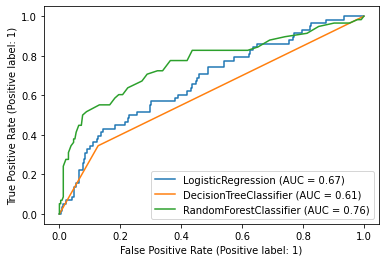

In [93]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import plot_roc_curve
disp = plot_roc_curve(model,X_test,Y_test)
plot_roc_curve(model2,X_test,Y_test,ax=disp.ax_)
plot_roc_curve(model3,X_test,Y_test,ax=disp.ax_)



* From AUC ROC curve we can see our Random Forest classifier gives the best score.
* When considered the test data we can say that accuracy has the best value. So we can say Random Forest Classifier is the best fit model for HR analytics data set

In [94]:
# To create Dataframe of predicted value with particular respective index
result1 = pd.DataFrame()  #target data
result1['Prediction of Train data']=X_train_prediction2
result1

,Prediction of Train data
0,0
1,0
2,1
3,0
4,0
...,...
1171,0
1172,0
1173,0
1174,0


In [95]:
# To create Dataframe of predicted value with particular respective index
result2 = pd.DataFrame()  #target data
result2['Prediction of Test data']=X_test_prediction2
result2

,Prediction of Test data
0,0
1,1
2,1
3,0
4,0
...,...
289,0
290,0
291,0
292,0


In [96]:
data_r=pd.concat([result1,result2],ignore_index=True)

In [97]:
data_r

,Prediction of Train data,Prediction of Test data
0,0.0,NaN
1,0.0,NaN
2,1.0,NaN
3,0.0,NaN
4,0.0,NaN
...,...,...
1465,NaN,0.0
1466,NaN,0.0
1467,NaN,0.0
1468,NaN,0.0


In [98]:
data_r.to_csv("HR analytics_case-study.csv")